In [402]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [403]:
# reading the csv file, del 2 columns from the file, checking first few rows of the file

data = pd.read_csv('BuyComputer.csv')

data.drop(columns=['User ID',],axis=1,inplace=True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [404]:
#Declare label as last column in the source file
Y = data.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [405]:
#Declaring X as all columns excluding last
X = data.iloc[:,:-1]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [406]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=17)

In [407]:
# Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [408]:
#Variabes to calculate sigmoid function
y_pred = []
len_x = len(X_train[0])
b = 0.2
print(len_x)

2


In [409]:
entries = len(X_train[:,0])
entries

320

In [410]:
w = np.zeros((len_x))
w

array([0., 0.])

In [411]:
# Sigmoid function
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [412]:

def predict(inputs):
    return sigmoid(inputs @ w.T   + b)

In [413]:
#Loss function
def loss_func(y,h):
    J = -(y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return J         

In [414]:
#Repeating the process 3000 times
JTheta = np.zeros((3000, 1))
learning_rate = 0.1
for iterations in range(3000):
    h = predict(X_train)
    diff = h - Y_train
    delta = (learning_rate / Y_train.size) * (X_train.T @ diff)
    w = w - delta.T
    delta = (learning_rate / Y_train.size) * (np.ones([1, Y_train.size]) @ diff)
    b = b - delta
    JTheta[iterations] = loss_func(Y_train, h)

In [415]:
#Print weight
print(w)

[2.54053276 1.28615638]


In [416]:
#print bias
print(b)

[-1.05491533]


In [417]:
#predicting the label
preds = predict(X_test)
preds

array([1.07253816e-03, 4.76696584e-02, 6.11643760e-02, 9.77468559e-01,
       5.95203127e-01, 2.84141255e-02, 4.11866740e-01, 4.56576130e-01,
       5.20148670e-02, 9.65149670e-02, 9.98154083e-01, 1.96829806e-02,
       1.03027464e-01, 6.81682774e-03, 2.73270258e-01, 3.39943802e-02,
       7.15945813e-01, 4.40219075e-03, 1.26087263e-01, 2.04228859e-01,
       2.75926510e-01, 2.49005500e-01, 3.50802823e-02, 3.75836519e-01,
       4.86078961e-01, 6.96337125e-04, 1.45888161e-01, 8.47278118e-03,
       9.76672908e-01, 7.18732637e-03, 9.14003776e-01, 3.79664217e-01,
       2.70925361e-01, 2.15970526e-02, 3.22092634e-01, 2.42884817e-03,
       7.94264401e-01, 1.56916133e-01, 1.03165771e-01, 9.51773651e-01,
       5.09026290e-01, 2.46520173e-01, 6.35888388e-02, 5.33149463e-03,
       2.73700922e-02, 7.69017095e-01, 9.96735700e-01, 4.32494662e-03,
       4.44113739e-01, 7.00990061e-03, 4.44113739e-01, 6.91831764e-02,
       9.95117669e-01, 1.50560967e-01, 2.05885273e-02, 9.89577223e-01,
      

In [418]:
def plot_loss(JTheta):
  plt.plot(JTheta, label='loss')
  plt.ylim([min(JTheta), max(JTheta)])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

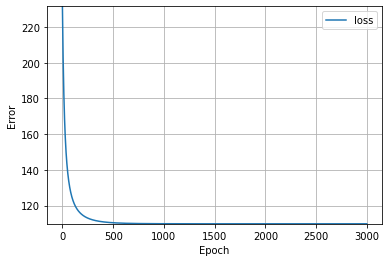

In [419]:
plot_loss(JTheta)


#Using sklearn LogisticRegression model

In [420]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 30)

#Fit
LR.fit(X_train, Y_train)

#predicting the test label with LR. Predict always takes X as input
preds = LR.predict(X_test)
print('Accuracy:',metrics.accuracy_score(Y_test, preds))

Accuracy: 0.825


**Exercise:**

Try logistic regression on BuyComputer dataset and set Random state=Your_RollNumber (last 3 digit of ID, incase if you don't have ID)